<a href="https://colab.research.google.com/github/Briana-Sevilla/MAT-421/blob/main/Module_G_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Set 9: Module G**

## Section 21.4: Simpson's Rule

**Simpson's Rule**: given two suintervals, $[x_{i-1},x_i]$ and $[x_i,x_{i+1}]$, a quadratic polynomial that passes points $(x_{i-1},f({x_{i-1}})),(x_i,f(x_i)),$ and $(x_{i+1},f(x_{i+1}))$ is used to integrate the function $f(x)$ that passes through these intervals.

To do this, we make a Lagrange polynomial that goes through these 3 said points. These polynomials are represented by the following equation:

$P_i(x)=\frac{f(x_{i-1})}{2h^2}(x-x_i)(x-x_{i+1})-\frac{f(x_i)}{h^2}(x-x_{i-1})(x-x_{i+1})+\frac{f(x_{i+1})}{2h^2}(x-x_{i-1})(x-x_i)$,

where $h=$ step size between points

Now that we have our polynomial, you just have to integrate:

$\int_{x_{i-1}}^{x_{i+1}}P_i(x)dx$

>Note: This method integrates over 2 subintervals. Thus, we **must have an even** number of intervals!

After calculating the area under $f(x)$ for every pair of subintervals, you add them all at the end.

The following shows all of this at once:

$\int_a^bf(x)dx \approx \frac{h}{3}[f(x_0)+4(\sum_{i=1,i\in odd}^{n-1}f(x_i))+2(\sum_{i=2,i\in even}^{n-2}f(x_i))+f(x_n)]$


Let's use Simpson's Rule to approximate $\int_{-\frac{\pi}{2}}^{\frac{\pi}{2}}cos(x)dx$ with 10 subintervals of the same step size over the interval $[-\frac{\pi}{2},\frac{\pi}{2}]$! Note, having 10 intervals means we have 11 evenly spaced grid points throughout the interval! Knowing that the answer is 2, how does this method compare?

In [ ]:
import numpy as np

a = -np.pi/2 # Lower bound
b = np.pi/2 # Upper bound
n = 11 # Number of grid points
h = (b - a) / (n - 1) # Length of each interval (step size)
x = np.linspace(a, b, n) # Values from a to b with n number of total points
f = np.cos(x) # Define function

Simpson_Rule = (h/3) * (f[0] + 2*sum(f[:n-2:2])
                        + 4*sum(f[1:n-1:2]) + f[n-1])

Error = 2 - Simpson_Rule
print("Approximation using Simpson's Rule: ",Simpson_Rule)
print("Error: ",Error)

Approximation using Simpson's Rule:  2.0001095173150043
Error:  -0.00010951731500430384


As you cann see, the approximation is very close!

\\

---

\\
## Section 21.5: Computing Integrals in Python

Luckily, we don't have to do all of this. We can use Python to compute integrals by using the *scipy.integrate* sub-package. The *trapz* function from this package takes an array of function values $f$ from a numerical grid $x$ as input arguments. Use this to approximate the integral above!

In [ ]:
import numpy as np
from scipy.integrate import trapezoid

a = -np.pi/2 # Lower bound
b = np.pi/2 # Upper bound
n = 11 # Number of grid points
h = (b - a) / (n - 1) # Length of each interval (step size)
x = np.linspace(a, b, n) # Values from a to b with n number of total points
f = np.cos(x) # Define function

Approximation_trapezoid = trapezoid(f,x)
Approximation = (h/2)*(f[0] + 2 * sum(f[1:n-1]) + f[n-1])



print("Approximation using Trapezoidal Rule Function in Python: ",Approximation_trapezoid)
print("Approximation using Trapezoidal Rule Equation (applied the actual formula)", Approximation)
print("Both Approximations are the same: True") if Approximation == Approximation_trapezoid else print("Both Approximations are the same: False")

Approximation using Trapezoidal Rule Function in Python:  1.9835235375094544
Approximation using Trapezoidal Rule Equation (applied the actual formula) 1.9835235375094544
Both Approximations are the same: True


To find the approximated cumulative integral, use *cumtrapz* function *cumsum*, which has the same inputs as *trapz*. Lets find the cumulative approximation of the same function above with a discretization step of 0.01. Plot the results.

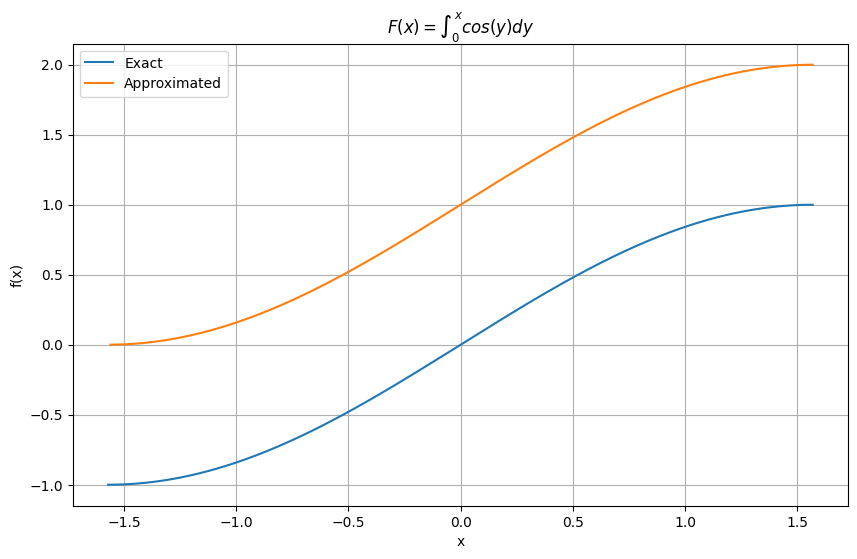

In [ ]:
from scipy.integrate import cumulative_trapezoid
import matplotlib.pyplot as plt
import numpy as np

a = -np.pi/2 # Lower bound
b = np.pi/2 # Upper bound
x = np.arange(a, b, 0.01)
F_exact = np.sin(x)
F_approx = cumulative_trapezoid(np.cos(x), x)

plt.figure(figsize = (10,6))
plt.plot(x, F_exact, label = "Exact")
plt.plot(x[1::], F_approx, label = "Approximated")
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('$F(x) = \int_0^{x} cos(y) dy$')
plt.legend()
plt.show()

Another way to approximate the integral is by using the *integrate.quad* function, which accepts $(f,a,b)$ as its inputs.

In [ ]:
from scipy.integrate import quad

# Outputs: approx of integral, estimated absolute error
quad, Estimated_abs_error = quad(np.cos, a, b)

Error = 2 - quad #actual error
print("Approximation using quad function: ",quad)
print("Estimated Absolute Error: ",Estimated_abs_error)
print("Actual Error: ",Error)

Approximation using quad function:  2.0
Estimated Absolute Error:  2.220446049250313e-14
Actual Error:  0.0


\\

$\heartsuit End \heartsuit$